In [1]:
import pandas as pd
from google.colab import files
files.upload()

Saving data tweet ptm2.csv to data tweet ptm2.csv
Saving slangword.csv to slangword.csv
Saving stopwords.txt to stopwords.txt
Saving StopWords_noise.txt to StopWords_noise.txt


{'StopWords_noise.txt': b'&\r\na\r\naa\r\naadc\r\naah\r\naak\r\naampw\r\naarrggh\r\naasep\r\naasl\r\nad\r\nadl\r\nadlh\r\naduh\r\naduw\r\nae\r\naek\r\nag\r\nagk\r\nah\r\naha\r\nahaha\r\naj\r\nak\r\naka\r\nakaka\r\nakakom\r\nakd\r\nakk\r\nakkh\r\nakn\r\nakng\r\nakyu\r\nal\r\nala\r\nalt\r\nam\r\nama\r\namp\r\nan\r\nand\r\nanu\r\nap\r\napatah\r\napayg\r\nape\r\napec\r\napjii\r\nar\r\narh\r\nas\r\nash\r\nass\r\nath\r\nato\r\natr\r\natw\r\nau\r\naw\r\nayo\r\nayoo\r\naz\r\nb\r\nba\r\nbah\r\nbak\r\nbay\r\nbb\r\nbc\r\nbdn\r\nbdp\r\nbe\r\nbea\r\nbee\r\nbehe\r\nbem\r\nben\r\nbeng\r\nbeul\r\nbf\r\nbfast\r\nbfi\r\nbg\r\nbgaya\r\nbgtbisa\r\nbgtmana\r\nbh\r\nbhs\r\nbi\r\nbin\r\nbl\r\nbla\r\nblabla\r\nblmpu\r\nbr\r\nbshare\r\nbsia\r\nbtw\r\nbu\r\nbuahe\r\nbun\r\nbw\r\nbwt\r\nc\r\nca\r\ncab\r\ncah\r\ncak\r\ncaln\r\ncc\r\ncf\r\ncha\r\ncie\r\nciecie\r\nciee\r\ncieh\r\nciek\r\nciey\r\ncih\r\ncik\r\nciyee\r\nciye\r\nciyeh\r\nck\r\nckckck\r\ncla\r\ncln\r\ncms\r\ncnn\r\nco\r\ncok\r\ncom\r\ncoy\r\ncp\r\ncr\r

In [49]:
df = pd.read_csv('/content/data tweet ptm2.csv')
df = df.drop_duplicates(subset=['text'],keep='first')
df.shape

(13477, 3)

In [50]:
df = df[~df.text.str.startswith('RT')]
df = df[~df.text.str.startswith('@')]
print(df.shape)
df.head()

(7840, 3)


,Tweet Datetime,text,location
0,2021-10-13 13:22:20,"Libur Maulid 1443H digeser Pemerintah(Juni 2021),saat pandemi covid-19 menuju puncak. Skrg Pemerintah membanggakn sbg yg terbaik seAsiaTenggara atasi covid-19, PON digelar, PTM dimulai,Turis Asing...",Jakarta Capital Region
1,2021-10-17 23:59:57,hari ini ptm/daring?,❝ 기다렸어 어서 와\n어디든 𝘄𝗲'𝗿𝗲 𝗰𝗼𝗺𝗶𝗻𝗴 𝘁𝗼𝗴𝗲𝘁𝗵𝗲𝗿 👫\n아무 걱정 하지 마\n잘 될 거야 𝗵𝗲𝗹𝗹𝗼 𝗳𝘂𝘁𝘂𝗿𝗲 🌻❞
5,2021-10-17 23:59:46,"Tl ku sepi bngett, kebanyakan dh pada ptm kali yaa",she/her
7,2021-10-17 23:59:32,MALES BNGT HARI INI PTM CUGS,Harry's heart
8,2021-10-17 23:59:30,"Ptm lagi huft antara bahagia ma engga, bahagia krna ga offline lgi tpi sedih krna ga bisa rebahan hiks",𝙀𝙭𝙤𝙥𝙡𝙖𝙣𝙚𝙩


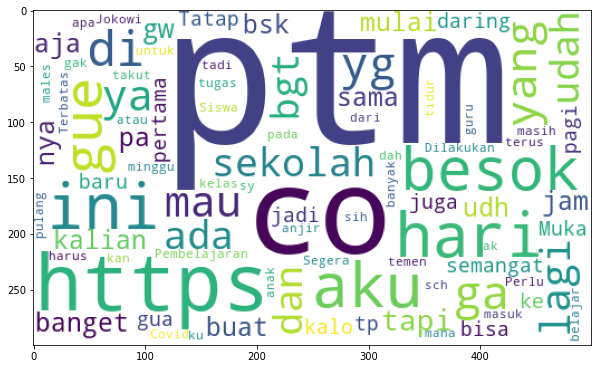

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.figure(figsize=(10,8))
word1 = WordCloud(width=500,height=300,background_color='white',min_font_size=10,max_words=150,collocations=False).generate(' '.join(df['text']))
plt.imshow(word1)

In [51]:
import re
import string
def remove_emoji(text):
  emoji_pattern = re.compile(
      '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        u'\U0001F923'
        ']+',flags= re.UNICODE)
  return emoji_pattern.sub(r'',text)
def remove_symbol(text):
  return re.sub(r'<\S+>','',text,flags=re.DOTALL)
def remove_hashtags(text):
  return re.sub(r'\B#\S+','',text)
def remove_mention(text):
  return re.sub(r'\B@\S+','',text)
def remove_url(text):
  return re.sub(r'https\S+','',text)
def remove_RT(text):
  return re.sub(r'RT @\w+:','',text)
def remove_punctuation(text):
  return re.sub('[%s]' % re.escape(string.punctuation),' ',text)
def preprocess(text):
  text = remove_emoji(text)
  text = remove_symbol(text)
  text = remove_RT(text)
  text = remove_hashtags(text)
  text = remove_mention(text)
  text = remove_url(text)
  text = remove_punctuation(text)
  return text
df['text'] = df['text'].apply(preprocess)
pd.set_option('max_colwidth',200)

In [53]:
slangword = pd.read_csv('/content/slangword.csv',delimiter=':')
slang = slangword['abnormal'].values.tolist()
meaning = slangword['normal'].values.tolist()

In [54]:
def slangs(text,slang,meaning):
  text = text.lower().split(' ')
  for i in range(len(text)):
    if text[i] in slang:
      index = slang.index(text[i])
      text[i] = meaning[index]
  return ' '.join(map(str,text))
def normalize(text,slang,meaning):
  df['text'] = df['text'].map(lambda x: slangs(x,slang,meaning))
  return df
df = normalize(df,slang,meaning)

In [55]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
!pip install Sastrawi
#stop = nltk.corpus.stopwords.words('indonesian')
newstop1 = open('/content/stopwords.txt','r').read().split()
stop.extend(newstop1)
newstop2 = open('/content/StopWords_noise.txt').read().split()
stop.extend(newstop2)
for x in ['dan','atau','sch','ptm','mana','anjir','nih','tidak','yang','ini','saya','besok','mau','harus','anjir','aku','hari']:
  stop.append(x)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
def remove_stopwords(text):
  text = [word.lower() for word in text.split() if word not in stop]
  return(' '.join(text))
def remove_word(text):
  text = [word for word in text.split() if len(word)>=3]
  return(' '.join(text))
def proccess(text):
  text = remove_stopwords(text)
  text = remove_word(text)
  return text
df['clean'] = df['text'].apply(proccess)
df_clean = df[~df.clean.str.contains('jual')]

In [57]:
df_clean = df_clean.dropna(subset=['clean'],axis=0)
df_clean.shape

(7837, 4)

In [58]:
df_clean[['text','clean']].iloc[700:720]

,text,clean
1683,bangun pagi beres rumah sarapan ptm,bangun pagi beres rumah sarapan
1684,minggu minggu sebelumnya aku belum bisa ptm makanya tidak tahu teman teman ku juga gada yang memberi tahu,minggu minggu teman teman gada
1686,bytheway presentasi agama saya sama teman saya beda absen anjrit dia ganjil mana pas ptm terus masa dia offline saya online saya harus piyeeee,bytheway presentasi agama teman beda absen anjrit ganjil offline online piyeeee
1688,haii haii baru pulang ptm lelah sangat sumpah,haii haii pulang lelah sumpah
1689,biasanya kalau lagi online bangun jam setengah 7\nsekarang lagi ptm bangun jam 5,online bangun jam bangun jam
1691,babinsa koramil 01 purworejo pelda keman dampingi petugas kesehatan puskesmas cangkrep lor melakukan posbindu ptm pos pembinaan terpadu penyakit tidak menular yang bertempat di balai desa pli...,babinsa koramil purworejo pelda keman dampingi petugas kesehatan puskesmas cangkrep lor posbindu pos pembinaan terpadu penyakit menular bertempat balai desa plipir kecamatan purworejo kabupaten pu...
1693,siswa sman 1 tabanan positif covid 19 ptm langsung distop,siswa sman tabanan positif covid langsung distop
1694,ptm seru bgtt tapi saya masih malu2 kebo,seru bgtt malu2 kebo
1698,daripada lesu lunglay karena dapat kabar mau ptm mending kita nyatet yuk buktul sepi sangat serius 2 tahun pakai 1 buktul\nterimakasih anak anak studytwt karena kalian aku tidak perlu repot2 nyate...,lesu lunglay kabar mending nyatet yuk buktul sepi serius pakai buktul terimakasih anak anak studytwt repot2 nyatet panik catatan
1699,hari ini saya ptm dan yya sosiologi mapel saya buat hari ini kn langsung ajj singkat cerita guru saya bahas materi globalisasi terus seperti bahas tentang budaya² begitu intinya eh tidak tahu ...,yya sosiologi mapel langsung ajj singkat cerita guru bahas materi globalisasi bahas budaya² intinya batiba guru langsung menyambung kpop sial otomatis mata teman kelas


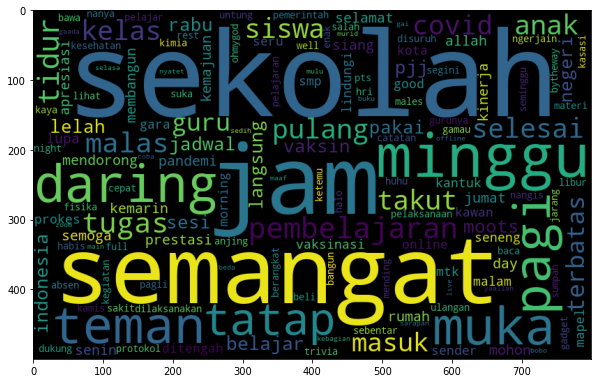

In [59]:
plt.figure(figsize=(10,8))
word2 = WordCloud(height=500,width=800,min_font_size=10,max_words=150,collocations=False,background_color='black',prefer_horizontal=0.9).generate(' '.join(df_clean['clean']))
plt.imshow(word2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


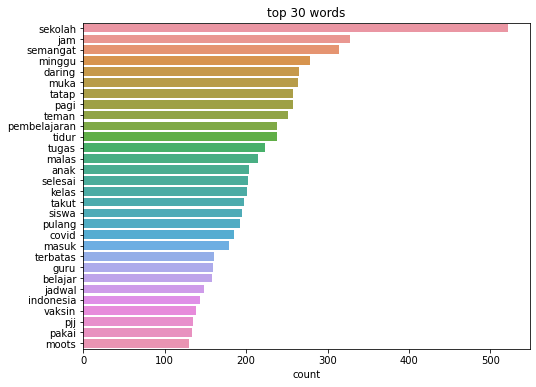

In [60]:
from nltk import word_tokenize,FreqDist,bigrams,trigrams
word_freq = FreqDist(w for w in word_tokenize(' '.join(df_clean['clean']).lower()) if (w not in stop) & (w.isalpha()))
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index',columns=['count'])
top30words = df_word_freq.sort_values('count',ascending=False).head(30)
plt.figure(figsize=(8,6))
plot_unigram = sns.barplot(top30words['count'],top30words.index)
plt.title('top 30 words')
plt.show()

In [ ]:
df_bg = list(bigrams([word for word in word_tokenize(' '.join(df_clean['clean'])) if (word not in stop) & word.isalpha()]))
bigram = FreqDist(bg for bg in df_bg)
df_bigram = pd.DataFrame.from_dict(bigram,orient='index',columns=['count'])
df_bigram.index = df_bigram.index.map(lambda x: ' '.join(x))
df_bigram = df_bigram.sort_values('count',ascending=False) .head(20)
plt.figure(figsize=(10,8))
sns.barplot(df_bigram['count'],df_bigram.index)
plt.show()

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score, silhouette_samples
tfidf = TfidfVectorizer(max_features=1000,ngram_range=(1,3),min_df=10,max_df=0.95)
tf_data = tfidf.fit_transform(df_clean['clean'])
tf_data.shape

(7837, 716)

In [64]:
from sklearn.cluster import KMeans
#using elbow method to define the cluster
range_cluster = [2,3,4,5,6,7,8,9]
sse = []

for i in range_cluster:
  km = KMeans(n_clusters=i,max_iter=100,init='k-means++',random_seed=24)
  km.fit(tf_data)
  sse.append(km.inertia_)

Text(0, 0.5, 'Sum of Square distance')

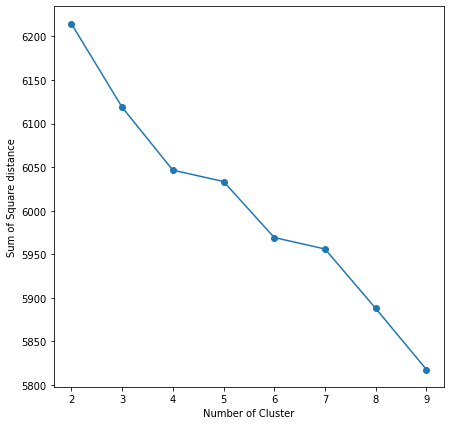

In [65]:
plt.figure(figsize=(7,7))
plt.plot(range_cluster,sse,'-o')
plt.xlabel(r'Number of Cluster')
plt.ylabel('Sum of Square distance')

In [83]:
num_cluster = 5
km = KMeans(num_cluster)
km.fit_predict(tf_data)
clusters = km.labels_.tolist()
df_text = df_clean[['text','clean']]
df_text['clusters'] = clusters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
df_text['clusters'].value_counts()

3    6246
0     775
1     348
2     234
4     234
Name: clusters, dtype: int64

In [85]:
feature_name = tfidf.get_feature_names()
top_features = 10
ordered_centroid = km.cluster_centers_.argsort()[:,::-1]
for cluster in range(num_cluster):
  key_features = [feature_name[index] for index in ordered_centroid[cluster,:top_features]]
  tweet = df_text[df_text['clusters']==cluster]['text'].values.tolist()
  print('Cluster#' + str(cluster+1))
  print('Key_features:',key_features)
  print('Tweet:',tweet)
  print('--'*40)

Cluster#1
Key_features: ['sekolah', 'malas', 'minggu', 'tidur', 'pulang', 'masuk', 'kelas', 'pagi', 'mohon', 'allah']
Tweet: ['malas sangat hari ini ptm cugs', 'ayo hujan yang deres biar banjir terus listrik sekolah mati terus wifi sama lcd sama kameranya mati terus tidak  bisa pjj maupun ptm  dan akhirnya jamkos  aamiin', 'bisa kebetulan sangat tiap ptm tuh pastu lagi pms 🥺 malas sangat kaya benar benar ruined', 'aku mulai ptm lagi minggu depan ', 'minggu depan ptm 🤢🤢🤢', 'sekolah saya bau2 mau ptm sksmsksnsksnsjsn malas sangat', '—13 10 2021\n\nhari ini ptm pertama kelas 8  tapi aku sesi dua jadi belum kah sekolah hehe ', 'besok ptm saya malas sangat', 'malas sangat besok ptm  mana fisika sama kimia jadi satu', 'minggu depan saya mau ptm\n\nmau pamer doang nih', 'besok ptm malas sangat langka batur e', 'sempat ada siswa terpapar covid 19  kini seluruh sekolah di bantul telah melaksanakan ptm  melalui ', 'gajadi ptm minggu ini', 'semoga minggu depan aku ptm  aamiin akan moost', 'ptn  k

In [ ]:
df_text[df_text['clusters']==3].iloc[1:20]